Name: Ramnarain Nair, Student Number: 100468356, Date: 23/10/2021

Objective: To prove or disprove the following statement - "The prices of mangoes are greater in 2020 than in 2019" 

In [1]:
# Importing all the relevant libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading/Reading the file (csv file)
data_1719 = pd.read_csv("mango17-19.csv", decimal = ",")

In [3]:
# Loading/Reading the file (json file)
data_20 = pd.read_json("mango2020.json")

In [4]:
# Description of 2019 data
data_19 = data_1719[data_1719["year"]==2019]
data_19NotTotalUS = data_19[data_19["region"]!= "TotalUS"]
data_19NotTotalUS.describe()

,ID,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,year,Profitability per unit,Total profitability
count,5616.000000,5616.000000,5.616000e+03,5.616000e+03,5.616000e+03,5616.000000,5.616000e+03,5.616000e+03,5.616000e+03,5616.000000,5616.0,5616.000000,5.616000e+03
mean,25.990919,1.516610,5.465834e+05,1.808513e+05,1.723113e+05,10258.448974,1.831596e+05,1.362057e+05,4.429922e+04,2654.617630,2019.0,1.061394,4.840888e+05
std,15.293569,0.434844,1.231489e+06,4.974125e+05,4.118746e+05,35809.352082,4.146082e+05,3.136880e+05,1.297158e+05,9414.245824,0.0,0.372966,1.100105e+06
min,0.000000,0.440000,5.150100e+02,0.000000e+00,0.000000e+00,0.000000,1.064500e+02,0.000000e+00,0.000000e+00,0.000000,2019.0,0.305000,7.133500e+02
25%,13.000000,1.220000,1.350528e+04,7.502375e+02,3.056575e+03,0.000000,7.839818e+03,5.157128e+03,3.650200e+02,0.000000,2019.0,0.790000,1.589271e+04
50%,26.000000,1.490000,1.158841e+05,8.586900e+03,2.782899e+04,123.995000,5.020551e+04,3.334450e+04,4.090685e+03,0.000000,2019.0,0.995000,1.080804e+05
75%,39.000000,1.770000,3.955536e+05,1.075163e+05,1.186055e+05,3043.895000,1.224249e+05,8.962295e+04,2.754101e+04,393.697500,2019.0,1.240000,3.625691e+05
max,52.000000,3.170000,1.127475e+07,5.160897e+06,4.684187e+06,469332.590000,4.145407e+06,3.403581e+06,1.627453e+06,95590.060000,2019.0,2.475000,1.128060e+07


The maximum value of average prices in 2019 is 3.17 and the mean in is 1.5166

In [5]:
# Description of the 2020 data
data_20NotTotalUS = data_20[data_20["region"] != "TotalUS"]
data_20NotTotalUS.describe()

,ID,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,year,Profitability per unit,Total profitability
count,1272.00000,1272.000000,1.272000e+03,1.272000e+03,1.272000e+03,1272.000000,1.272000e+03,1.272000e+03,1.272000e+03,1272.000000,1272.0,1272.000000,1.272000e+03
mean,5.50000,1.348294,6.753979e+05,2.223233e+05,2.017356e+05,11320.677044,2.400134e+05,1.764768e+05,6.005600e+04,3480.519096,2020.0,0.842543,4.629353e+05
std,3.45341,0.306694,1.495259e+06,5.943151e+05,5.038211e+05,45130.032397,5.260355e+05,3.869834e+05,1.954194e+05,12530.354452,0.0,0.178474,9.791398e+05
min,0.00000,0.560000,2.064900e+03,0.000000e+00,6.600000e+00,0.000000,9.884500e+02,2.844300e+02,0.000000e+00,0.000000,2020.0,0.430000,2.054575e+03
25%,2.75000,1.140000,1.748087e+04,7.633050e+02,2.702135e+03,0.000000,1.143816e+04,8.870212e+03,4.716925e+02,0.000000,2020.0,0.705000,1.718836e+04
50%,5.50000,1.345000,1.446565e+05,1.311699e+04,2.640124e+04,164.825000,6.733826e+04,4.358257e+04,7.981460e+03,0.000000,2020.0,0.840000,1.180863e+05
75%,8.25000,1.560000,5.029578e+05,1.111254e+05,1.335941e+05,4019.762500,1.656469e+05,1.196995e+05,3.629093e+04,780.762500,2020.0,0.975000,3.781061e+05
max,11.00000,2.300000,1.089468e+07,4.772922e+06,5.402444e+06,667141.610000,4.014132e+06,3.398570e+06,2.838239e+06,131300.760000,2020.0,1.325000,5.992073e+06


There seems to be a very large maximum value for the average price (1660).
As a result of this, the mean of the average price is most likely misleading.
It can be corrected by searching for this value in the json file and correcting it.
The error is most likely a typing error and is meant to be 1.66 instead of 1660.
Now, we re-run the commands above with the corrected file and describe the data once again.

In [6]:
# Description of corrected file (cleaning the data)
data_20NotTotalUS.describe()

,ID,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,year,Profitability per unit,Total profitability
count,1272.00000,1272.000000,1.272000e+03,1.272000e+03,1.272000e+03,1272.000000,1.272000e+03,1.272000e+03,1.272000e+03,1272.000000,1272.0,1272.000000,1.272000e+03
mean,5.50000,1.348294,6.753979e+05,2.223233e+05,2.017356e+05,11320.677044,2.400134e+05,1.764768e+05,6.005600e+04,3480.519096,2020.0,0.842543,4.629353e+05
std,3.45341,0.306694,1.495259e+06,5.943151e+05,5.038211e+05,45130.032397,5.260355e+05,3.869834e+05,1.954194e+05,12530.354452,0.0,0.178474,9.791398e+05
min,0.00000,0.560000,2.064900e+03,0.000000e+00,6.600000e+00,0.000000,9.884500e+02,2.844300e+02,0.000000e+00,0.000000,2020.0,0.430000,2.054575e+03
25%,2.75000,1.140000,1.748087e+04,7.633050e+02,2.702135e+03,0.000000,1.143816e+04,8.870212e+03,4.716925e+02,0.000000,2020.0,0.705000,1.718836e+04
50%,5.50000,1.345000,1.446565e+05,1.311699e+04,2.640124e+04,164.825000,6.733826e+04,4.358257e+04,7.981460e+03,0.000000,2020.0,0.840000,1.180863e+05
75%,8.25000,1.560000,5.029578e+05,1.111254e+05,1.335941e+05,4019.762500,1.656469e+05,1.196995e+05,3.629093e+04,780.762500,2020.0,0.975000,3.781061e+05
max,11.00000,2.300000,1.089468e+07,4.772922e+06,5.402444e+06,667141.610000,4.014132e+06,3.398570e+06,2.838239e+06,131300.760000,2020.0,1.325000,5.992073e+06


A maximum average price of 145 still seems to be quite high and is most likely a typing error once again.
The mean of the average price is most likely misleading once again (possibly due to the typing errors).
The error is most likely a typing error and is meant to be 1.45 instead of 145.
Now, we re-run the commands above with the corrected data and describe the data once again.

Note: Since the mango2020.json file has already been corrected, the description of the 2020 dataset is the same each
time regardless of the correction. I have just left it in there to show the process of cleaning the data.

In [7]:
# Description of corrected file (second correction - cleaning the data)
data_20NotTotalUS.describe()

,ID,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,year,Profitability per unit,Total profitability
count,1272.00000,1272.000000,1.272000e+03,1.272000e+03,1.272000e+03,1272.000000,1.272000e+03,1.272000e+03,1.272000e+03,1272.000000,1272.0,1272.000000,1.272000e+03
mean,5.50000,1.348294,6.753979e+05,2.223233e+05,2.017356e+05,11320.677044,2.400134e+05,1.764768e+05,6.005600e+04,3480.519096,2020.0,0.842543,4.629353e+05
std,3.45341,0.306694,1.495259e+06,5.943151e+05,5.038211e+05,45130.032397,5.260355e+05,3.869834e+05,1.954194e+05,12530.354452,0.0,0.178474,9.791398e+05
min,0.00000,0.560000,2.064900e+03,0.000000e+00,6.600000e+00,0.000000,9.884500e+02,2.844300e+02,0.000000e+00,0.000000,2020.0,0.430000,2.054575e+03
25%,2.75000,1.140000,1.748087e+04,7.633050e+02,2.702135e+03,0.000000,1.143816e+04,8.870212e+03,4.716925e+02,0.000000,2020.0,0.705000,1.718836e+04
50%,5.50000,1.345000,1.446565e+05,1.311699e+04,2.640124e+04,164.825000,6.733826e+04,4.358257e+04,7.981460e+03,0.000000,2020.0,0.840000,1.180863e+05
75%,8.25000,1.560000,5.029578e+05,1.111254e+05,1.335941e+05,4019.762500,1.656469e+05,1.196995e+05,3.629093e+04,780.762500,2020.0,0.975000,3.781061e+05
max,11.00000,2.300000,1.089468e+07,4.772922e+06,5.402444e+06,667141.610000,4.014132e+06,3.398570e+06,2.838239e+06,131300.760000,2020.0,1.325000,5.992073e+06


The data maximum of average price seems about right now (2.3) and the mean of average price is 1.348

Note: Since the mango2020.json file has already been corrected, the description of the 2020 dataset is the same each
time regardless of the correction. I have just left it in there to show the process of cleaning the data.

Based on these descriptions, it seems like 2019 has a higher average price than 2020, however we need to do
futher analysis to prove if this is actually the case. The we should standard deviation for 2019 is also higher than
keep in mind that the standard deviation of average price for 2019 is higher than 2020 as well (0.43 vs 0.3), which could be an indication of more volatility in the average price for 2019.

In [8]:
# Creating a variable that merges data for the years 2019 & 2020
data_merged = data_19NotTotalUS.append(data_20NotTotalUS, sort = "True")

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

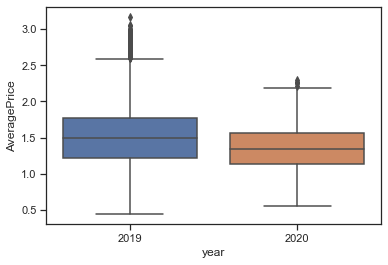

In [9]:
# Boxplot segragated by year (Not TotalUS but by each individual state - non-aggregated data)
sns.set(style="ticks", color_codes = True)
df_plot = data_merged[["AveragePrice", "year"]]
sns.boxplot(x="year", y="AveragePrice", data = df_plot)

Looking at the boxplot for the non-aggregated data, we can see that the avergae price for 2019 is higher than that
of 2020. However, an important thing to note is that the maximum and minimum are higher and lower respectively for
2019, which is likely the reason why it has a higher standard deviation for average prices. The implication of this is that in some regions the prices of products could have been either higher or lower in 2019 compared to 2020. The boxplot for 2019 also shows that 2019 has a lot more outliers above the maximum compared to 2020, which possibly influences the overall average price of the dataset for 2019 greatly. Another important consideration would be that there is a lot more data available for 2019 in comparison to 2020, potentially resulting in a slight bias for the results of 2019.

Text(0.5, 1.0, 'Average Price of Mango According to Region 2019')

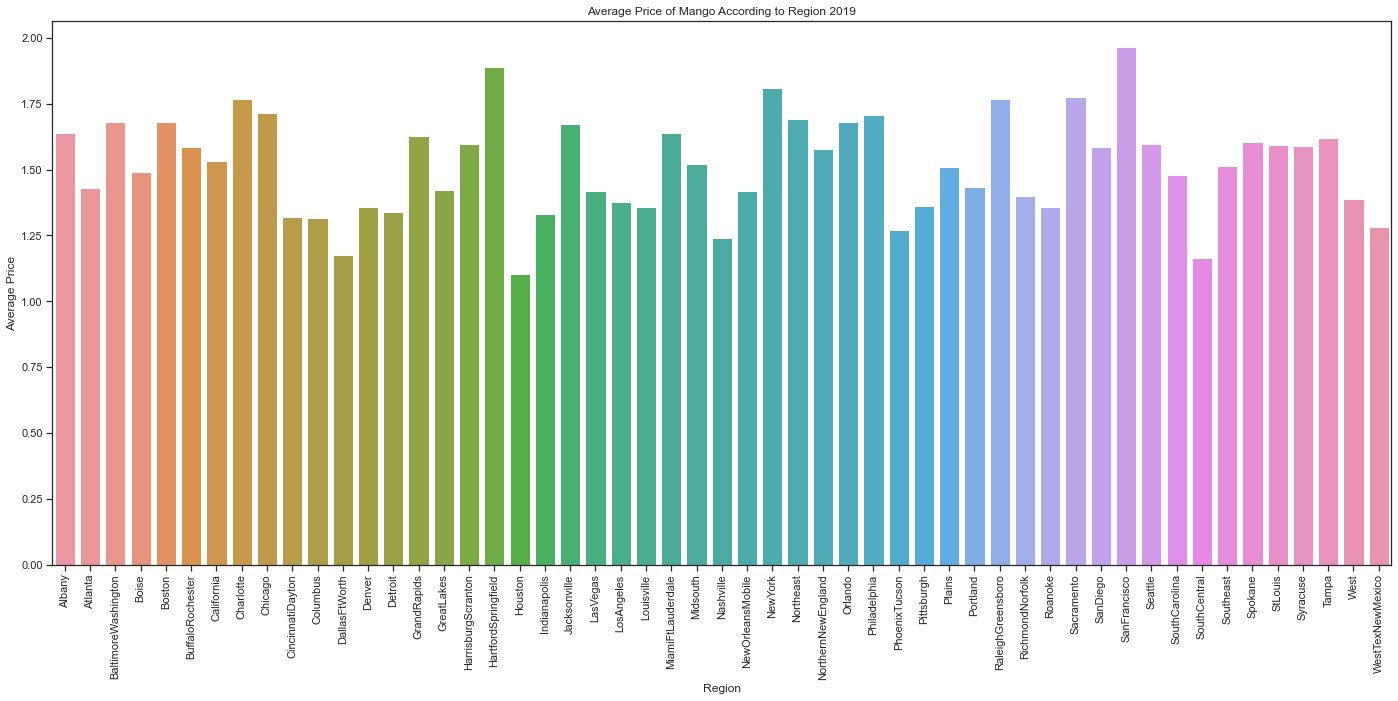

In [10]:
# Plotting the average price of mango according to region for 2019
region_list19 = list(data_19NotTotalUS.region.unique())
average_price19 = []

for i in region_list19:
    x = data_19NotTotalUS[data_19NotTotalUS.region == i]
    region_average = sum(x.AveragePrice)/len(x)
    average_price19.append(region_average)
    
plt.figure(figsize = (24,10))
ax = sns.barplot(x = region_list19, y = average_price19)

plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Mango According to Region 2019')



Based on the plot above, it looks like the regions some of the highest average prices in 2019 are San Franciso,
HartfordSpringfield, New York, Raleigh Greensboro and Jacksonville. There are other regions with high average
prices as well but these ones stick out the most. In 2019, the prices in most regions generally tend to be above
1.25.

Text(0.5, 1.0, 'Average Price of Mango According to Region 2020')

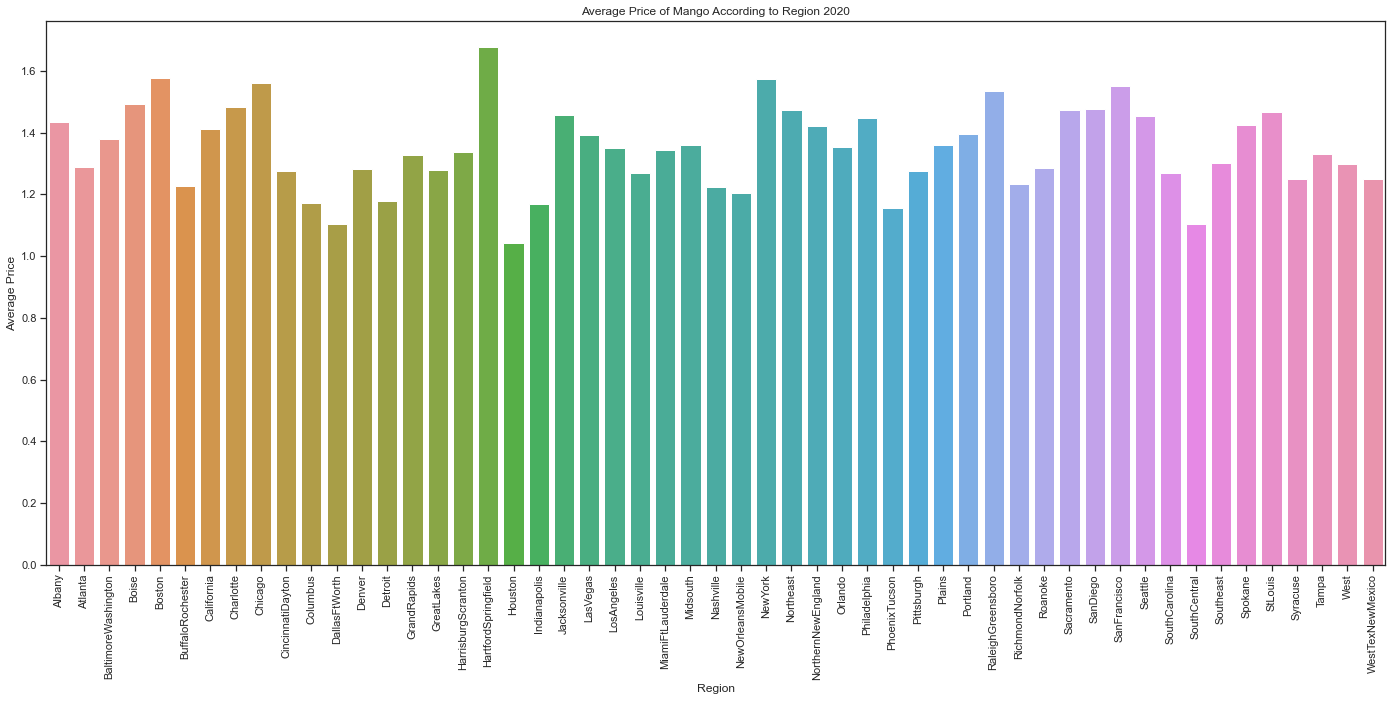

In [11]:
# Plotting the average price of mango according to region for 2020
region_list20 = list(data_20NotTotalUS.region.unique())
average_price20 = []

for j in region_list20:
    x = data_20NotTotalUS[data_20NotTotalUS.region == j]
    region_average = sum(x.AveragePrice)/len(x)
    average_price20.append(region_average)
    
plt.figure(figsize = (24,10))
ax = sns.barplot(x = region_list20, y = average_price20)

plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Mango According to Region 2020')

Based on the plot above, it looks like the regions some of the highest average prices in 2019 are San Franciso,
HartfordSpringfield, New York and Raleigh Greensboro. There are other regions with higher average prices as well
but these ones stick out the most. In 2020, the prices in most regions generally tend to be above
1.1.

In [12]:
# Shapiro-Wilk test to test for normality for 2019
shapiro(data_19NotTotalUS["AveragePrice"])

ShapiroResult(statistic=0.9858977794647217, pvalue=2.949626339723902e-23)

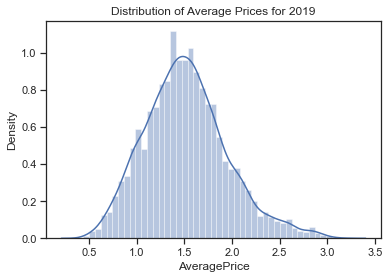

In [13]:
# Dist plot of 2019 average prices
sns.distplot(data_19NotTotalUS["AveragePrice"])   
plt.title("Distribution of Average Prices for 2019")
plt.show()

In [14]:
# Shapiro-Wilk test to test for normality for 2020
shapiro(data_20NotTotalUS["AveragePrice"])

ShapiroResult(statistic=0.9973505735397339, pvalue=0.03347940370440483)

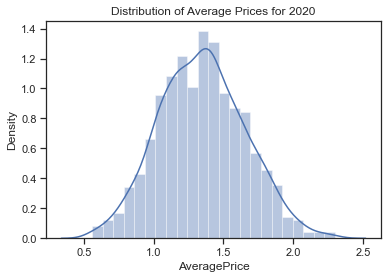

In [15]:
# Dist plot of 2020 average prices
sns.distplot(data_20NotTotalUS["AveragePrice"])   
plt.title("Distribution of Average Prices for 2020")
plt.show()

The shapiro test on the average price for 2019 successfully reject the null --> The data is not normally distributed.
The shapiro test on the average price for 2020 successfully rejects the null --> The data is not normally
distributed (All rejects the null hypothesis at a 5% significance level).
As the observations in each sample are not normally distributed, it is not possible to use the paired sample
t-test and therfore, the Mann-Whitney U test should be used to see if there is a significant difference in the average prices of 2019 and 2020.

In [16]:
mannwhitneyu(data_19NotTotalUS["AveragePrice"],data_20NotTotalUS["AveragePrice"])

MannwhitneyuResult(statistic=2756375.0, pvalue=1.932387025865039e-37)

The U-test indicates that we can successfully reject the null hypothesis and hence, the results are 
statistically significant. This means that there is significant evidence that the Average Price 
in 2019 and 2020 are different. Based on the descriptive statistics,the prices by region and the by looking at the 
plots, it is likely that the prices in 2020 are higher than in 2019. However, it is extremely important to keep in
mind that the data for 2020 is very much lacking in comparison to 2019 and combined with the
fact that the coronavirus began in early 2020, the prices might have been even lower in 2020. As a result,
this could have largely influenced the results. It would be a good idea to ask the company supplying the 
data to provide the data for the remaining part of 2020, which might then give us different results than what
was found.

Note: The 2020 average price is subtracted from the 2019 average price for each region


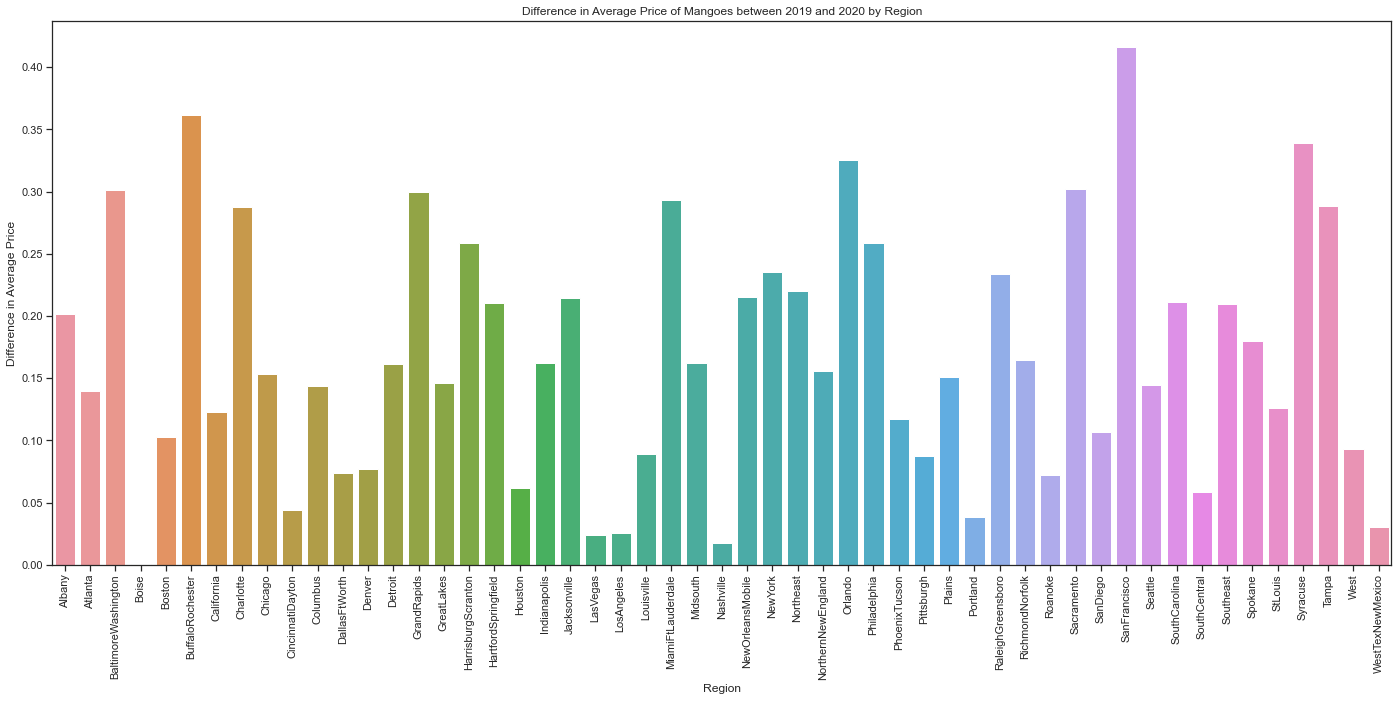

In [17]:
# Plotting the difference in the average price between 2019 and 2020 by region
region_list = list(data_19NotTotalUS.region.unique())
average_priceDiff = []

for j in region_list20:
    x = data_20NotTotalUS[data_20NotTotalUS.region == j]
    y = data_19NotTotalUS[data_19NotTotalUS.region == j]
    region_average20 = sum(x.AveragePrice)/len(x)
    region_average19 = sum(y.AveragePrice)/len(y)
    average_priceDiff.append(region_average19 - region_average20)
    
plt.figure(figsize = (24,10))
ax = sns.barplot(x = region_list, y = average_priceDiff)

plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Difference in Average Price')
plt.title('Difference in Average Price of Mangoes between 2019 and 2020 by Region')

print("Note: The 2020 average price is subtracted from the 2019 average price for each region")

Looking at the difference in average price of mangoes in 2019 and 2020 by region, we can see that almost all 
of the bars are above 0. The only exception is for the region of Boise, which is equal to 0, indicating that there
was no difference in the average price between 2019 and 2020. For the remaining regions, the value of the bars
indicate that in 2019 the prices were higher than for 2020 because the bars are positive. Some regions that stand
out in particular are San Francisco, Buffalo Rochester, Orlando and Syracuse. These regions seem to have average prices that are significantly higher in 2019 compared to 2020. Not only are the average prices larger for 2019 than 2020 for the overall dataset but it seem like the average price is larger by region as well between the years, with the exception of Boise.

In [18]:
# Average price by months for 2019
data_merged["months"] = pd.DatetimeIndex(data_merged['Date']).month # creates new variable extracting months from date
data_merged[data_merged["year"]==2019].groupby(by = 'months')['AveragePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
months,,,,,,,,
1,530.0,1.394472,0.458980,0.51,1.0425,1.355,1.6700,3.00
2,424.0,1.384316,0.438502,0.49,1.0800,1.330,1.6550,2.67
3,424.0,1.529623,0.429140,0.57,1.2400,1.525,1.7625,2.97
4,424.0,1.543467,0.433871,0.68,1.2300,1.505,1.8300,3.17
5,636.0,1.445220,0.451253,0.44,1.1300,1.415,1.7425,2.92
6,316.0,1.568639,0.424720,0.70,1.2900,1.505,1.7925,2.76
7,424.0,1.545094,0.368401,0.60,1.3375,1.490,1.7200,2.66
8,530.0,1.666509,0.452859,0.57,1.3700,1.620,1.9000,3.04
9,424.0,1.669363,0.442292,0.65,1.3875,1.620,1.9100,2.95


In [19]:
# Average price by months for 2020
data_merged[data_merged["year"]==2020].groupby(by = 'months')['AveragePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
months,,,,,,,,
1,424.0,1.388042,0.297580,0.68,1.17,1.380,1.590,2.30
2,424.0,1.319623,0.329119,0.56,1.06,1.340,1.535,2.25
3,424.0,1.337217,0.288486,0.56,1.13,1.325,1.550,2.16


Text(0, 0.5, 'Average Price')

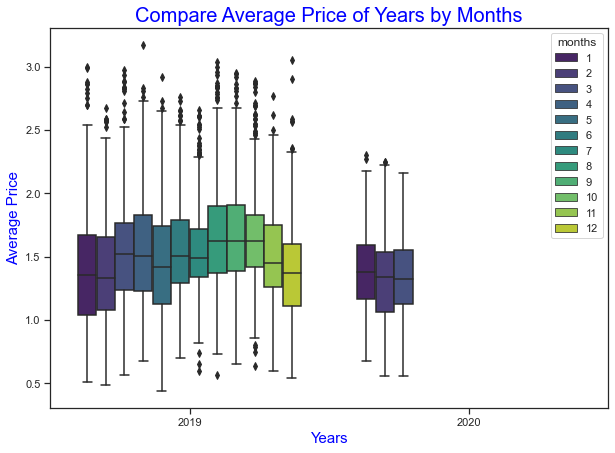

In [20]:
# Compare Average Price of Years by Months boxplot
import datetime
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(x="year", y="AveragePrice", hue="months", data = data_merged, palette="viridis");
plt.title("Compare Average Price of Years by Months", fontsize = 20, color = "blue")
plt.xlabel("Years", fontsize = 15, color = "blue")
plt.ylabel("Average Price", fontsize = 15, color = "blue")

Looking at the boxplot above and the description of the date it looks like for 2019, the mean of the average price for august, september and october are the some of the highest compared to the other months. However, the standard devations for each of these months is also quite high. The differences between the maximum and minimum are quite large as well, possibly indicating a lot of volatility for these months. The number of outliers for these three months above the maximum is also quite large collectively. It might have been the case that there was a lot more demand during these months compared to others, resulting in an overall increase in average prices. These months could have contributed significantly to the higher average prices in 2019 compared to 2020 however, we have to keep in mind the extreme lack of data for 2020, which is most likely the biggest explanation to the results that were found. 

Final Conlusion Statement 1: False - The average prices of mangoes in 2019 are greater than in 2020 (Based on the visualisations, statistical descriptions and explanations above). However, it is extremely important to note that there is a significant lack of data for 2020, most likely causing a bias in our results. 

Objective: To prove or disprove the following statement - "Profits of organic are greater than non-organic"

In [21]:
# Merging the datasets from 2017-2019 with 2020
data_all = data_1719.append(data_20, sort = "True") 
data_allNotTotalUS = data_all[data_all["region"] != "TotalUS"]

In [22]:
data_allNotTotalUS.describe()

,AveragePrice,ID,Large Bags,Profitability per unit,Small Bags,Total Volume,Total profitability,Type 4,Type1,Type2,Type3,XLarge Bags,year
count,19183.000000,19183.000000,1.918300e+04,19183.000000,1.918300e+04,1.918300e+04,1.918300e+04,1.918300e+04,1.918300e+04,1.918300e+04,19183.000000,19183.000000,19183.000000
mean,1.403686,22.990043,3.619990e+04,0.987682,1.201996e+05,5.482859e+05,4.503813e+05,1.584670e+05,1.863613e+05,1.891191e+05,14337.020289,2067.516399,2018.270708
std,0.398791,15.693464,1.212184e+05,0.341093,2.875792e+05,1.244540e+06,1.116180e+06,3.780541e+05,5.208020e+05,4.556035e+05,48587.233222,8550.929776,1.018472
min,0.440000,0.000000,0.000000e+00,0.280000,0.000000e+00,8.456000e+01,8.414000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2017.000000
25%,1.100000,9.000000,1.265750e+02,0.730000,3.068085e+03,1.095051e+04,1.210823e+04,5.358295e+03,8.170000e+02,2.898515e+03,0.000000,0.000000,2017.000000
50%,1.370000,22.000000,2.603430e+03,0.935000,2.562539e+04,1.030812e+05,8.944522e+04,3.893744e+04,8.078350e+03,2.667233e+04,164.230000,0.000000,2018.000000
75%,1.660000,37.000000,2.073578e+04,1.160000,8.254383e+04,4.069570e+05,3.323065e+05,1.087811e+05,1.024159e+05,1.319565e+05,5581.830000,139.630000,2019.000000
max,3.250000,52.000000,2.838239e+06,2.475000,3.403581e+06,1.127475e+07,5.555306e+07,4.145407e+06,5.160897e+06,5.402444e+06,804558.250000,131300.760000,2020.000000


In [23]:
# Descriptive statistics of average price for each type mangos
data_allNotTotalUS.groupby(by = 'type')['AveragePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
conventional,9593.0,1.157289,0.260936,0.46,0.98,1.13,1.32,2.22
organic,9590.0,1.650160,0.358515,0.44,1.42,1.62,1.86,3.25


<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

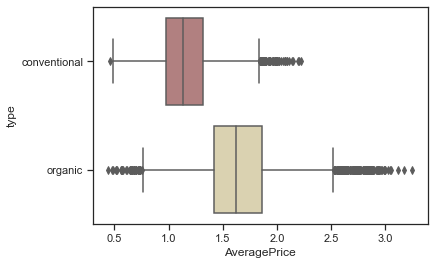

In [24]:
# Boxplot of Average Price of mangoes by type
sns.boxplot(y="type", x="AveragePrice", data = data_allNotTotalUS, palette = "pink")

It seems as thought the average price of organic mangoes is higher than conventional mangoes despite some outliers
in the lower side. It could be that the outliers in the higher side compensate for the ones in the lower side and hence, the average price of organic mangos is higher in combination with those that are not outliers. The standard deviation of organic mangoes is also higher than conventional mangoes, indicating more volatilty in the average prices. It seems like conventional mangoes have more stability in its average prices. We can verify all of this with hypothesis testing.

In [25]:
# Shapiro test on conventional mangoes average price 
conventional_type_price = data_allNotTotalUS[data_allNotTotalUS["type"] == "conventional"]
shapiro(conventional_type_price.AveragePrice)

ShapiroResult(statistic=0.9871230125427246, pvalue=1.3706949340350899e-28)

In [26]:
# Shapiro test on organic mangoes average price
organic_type_price = data_allNotTotalUS[data_allNotTotalUS["type"] == "organic"]
shapiro(organic_type_price.AveragePrice)

ShapiroResult(statistic=0.9861581921577454, pvalue=1.584637253111866e-29)

Both of the tests above fail to reject the null hypothesis --> the data is normally distributed and we can use 
a paired students t-test

In [27]:
stat, p = ttest_ind(conventional_type_price.AveragePrice,organic_type_price.AveragePrice)
print("The p-value is {}".format(p))

The p-value is 0.0


Significant p-value indicates we can reject the null and the Average prices of conventional and organic are unequal
It is probably the case that average price of organic is larger than conventional based on the data and plots found above.

In [28]:
# Descriptive statistics of total profitability for each type mangos
data_allNotTotalUS.groupby(by = 'type')['Total profitability'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
conventional,9593.0,865517.238503,1.463931e+06,23696.81,150320.1000,327346.790,739876.4900,55553060.96
organic,9590.0,35115.473847,5.998021e+04,84.14,5488.3975,12088.585,32886.1425,715825.93


In [29]:
# Replaces any spaces in the variable names
data_allNotTotalUS.columns = data_allNotTotalUS.columns.str.replace(' ', '')

Text(0, 0.5, 'Total Profitability per unit')

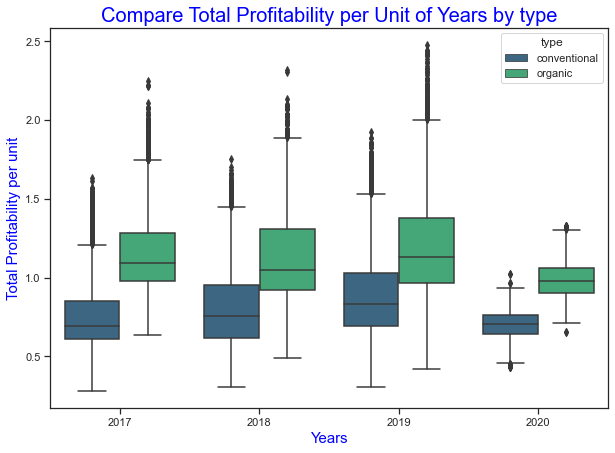

In [30]:
# Total profitability per unit by year and type boxplot
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(x="year", y="Profitabilityperunit", hue="type", data = data_allNotTotalUS, palette="viridis");
plt.title("Compare Total Profitability per Unit of Years by type", fontsize = 20, color = "blue")
plt.xlabel("Years", fontsize = 15, color = "blue")
plt.ylabel("Total Profitability per unit", fontsize = 15, color = "blue")

Text(0, 0.5, 'Total Volume')

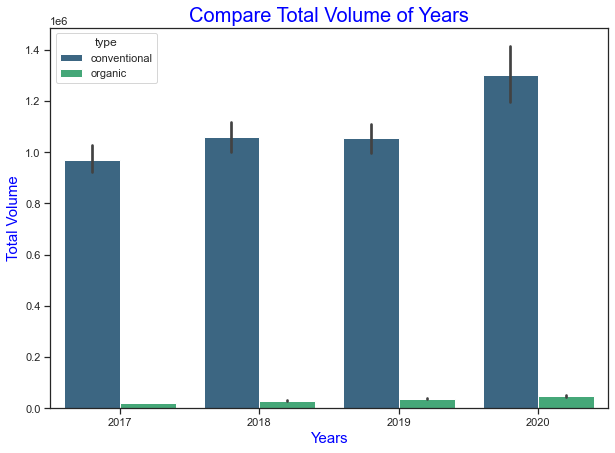

In [31]:
# Total Volume by year and type
f,ax = plt.subplots(figsize = (10,7))
sns.barplot(x="year", y="TotalVolume", hue="type", data = data_allNotTotalUS, palette="viridis");
plt.title("Compare Total Volume of Years", fontsize = 20, color = "blue")
plt.xlabel("Years", fontsize = 15, color = "blue")
plt.ylabel("Total Volume", fontsize = 15, color = "blue")

Although the profitability per unit of organic mangoes might have been higher througout the years, which makes sense because the average price of organic mangoes is also higher, it does not particularly mean the total profitability of organic mangoes is also higher. From the data, the total volume of organic mangoes is a lot less than conventional and as a result of this the total profitability of conventional mangoes might end up being higher. We will verify this below:

The profits for conventional and organic are $8,302,906,868.956269 and $336,757,394.1966494 respectively


Text(0.5, 1.0, 'Total Profit of Mango According to type')

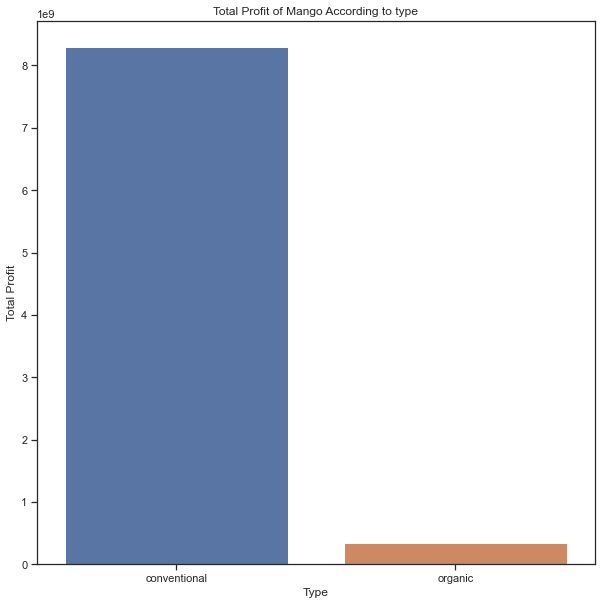

In [32]:
# Plotting the total profitability of mango according to type
type_list = list(data_allNotTotalUS.type.unique())
total_profit = []

for j in type_list:
    x = data_allNotTotalUS[data_allNotTotalUS.type == j]
    type_profit = sum(x.Totalprofitability)
    total_profit.append(type_profit)
    
print('The profits for conventional and organic are ${:,} and ${:,} respectively'.
      format(total_profit[0], total_profit[1]))    
    
plt.figure(figsize = (10,10))
ax = sns.barplot(x = type_list, y = total_profit)

plt.xticks(rotation = 0)
plt.xlabel('Type')
plt.ylabel('Total Profit')
plt.title('Total Profit of Mango According to type')

The volume for conventional and organic are 10,214,698,993.849949 and 303,069,503.7900013 respectively


Text(0.5, 1.0, 'Total Volume of Mango According to type')

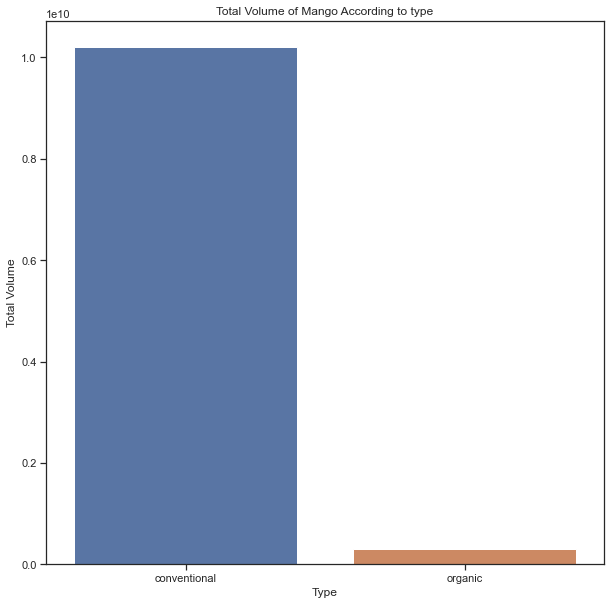

In [33]:
# Plotting the total volume of mango according to type
type_list = list(data_allNotTotalUS.type.unique())
total_volume = []

for j in type_list:
    x = data_allNotTotalUS[data_allNotTotalUS.type == j]
    type_volume = sum(x.TotalVolume)
    total_volume.append(type_volume)
    
print('The volume for conventional and organic are {:,} and {:,} respectively'.
      format(total_volume[0], total_volume[1]))    
    
plt.figure(figsize = (10,10))
ax = sns.barplot(x = type_list, y = total_volume)

plt.xticks(rotation = 0)
plt.xlabel('Type')
plt.ylabel('Total Volume')
plt.title('Total Volume of Mango According to type')

Looking at the descriptive statistics and plot above, it seems like the total profitability
of conventional mangoes are greater than that organic mangoes and the total volume of conventional maangoes is also significantly higher than organic mangoes. Considering that the number of observations are also around the same for each type, it could be that that the statement: "profits for organic are greater than non-organic" is false. We can verify this statement by doing a hypothesis test.

In [34]:
# Shapiro test for normality on conventional mangoes profits
conventional_type_profits = data_allNotTotalUS[data_allNotTotalUS["type"] == "conventional"]
shapiro(conventional_type_profits.Totalprofitability)

ShapiroResult(statistic=0.5370904207229614, pvalue=0.0)

In [35]:
# Shapiro test for normality on organic mangoes profits
organic_type_profits = data_allNotTotalUS[data_allNotTotalUS["type"] == "organic"]
shapiro(organic_type_profits.Totalprofitability)

ShapiroResult(statistic=0.5658812522888184, pvalue=0.0)

Both successfully rejct the null hypothesis --> not normally distributed hence, we use the U-test once again

In [36]:
mannwhitneyu(conventional_type_profits.Totalprofitability, organic_type_profits.Totalprofitability)

MannwhitneyuResult(statistic=3343314.0, pvalue=0.0)

The results of the mann whitney U-test indicates that we can successfully reject the null hypothesis and so 
it is statistically significant. This means that there is significant evidence that the average profits of 
conventional are different from organic overall. Looking at the data above, it is likely that the total profitability for conventional is higher from a statistical point of view.

In [37]:
# Correlation matrix of the variables dataset
data_allNotTotalUS.corr()

,AveragePrice,ID,LargeBags,Profitabilityperunit,SmallBags,TotalVolume,Totalprofitability,Type4,Type1,Type2,Type3,XLargeBags,year
AveragePrice,1.000000,-0.111506,-0.247858,0.699703,-0.300131,-0.345942,-0.266790,-0.311440,-0.345079,-0.266742,-0.237741,-0.161954,0.063522
ID,-0.111506,1.000000,-0.025381,-0.055688,-0.015157,0.014469,0.008435,-0.020296,0.019090,0.028329,0.058301,-0.027764,-0.280317
LargeBags,-0.247858,-0.025381,1.000000,-0.166090,0.601161,0.668615,0.562461,0.784065,0.590427,0.464857,0.337811,0.271235,0.120076
Profitabilityperunit,0.699703,-0.055688,-0.166090,1.000000,-0.198656,-0.221120,-0.084374,-0.206533,-0.213369,-0.173390,-0.143922,-0.095687,-0.045668
SmallBags,-0.300131,-0.015157,0.601161,-0.198656,1.000000,0.922436,0.804801,0.967147,0.771009,0.776791,0.554121,0.606119,0.114341
TotalVolume,-0.345942,0.014469,0.668615,-0.221120,0.922436,1.000000,0.882518,0.928589,0.896241,0.868780,0.635967,0.553736,0.038274
Totalprofitability,-0.266790,0.008435,0.562461,-0.084374,0.804801,0.882518,1.000000,0.803933,0.772225,0.800573,0.565541,0.503523,0.022168
Type4,-0.311440,-0.020296,0.784065,-0.206533,0.967147,0.928589,0.803933,1.000000,0.786094,0.750250,0.543271,0.570651,0.127982
Type1,-0.345079,0.019090,0.590427,-0.213369,0.771009,0.896241,0.772225,0.786094,1.000000,0.599703,0.497935,0.454842,0.011944
Type2,-0.266742,0.028329,0.464857,-0.173390,0.776791,0.868780,0.800573,0.750250,0.599703,1.000000,0.610592,0.455755,-0.009868


Looking at the  correlation matrix of the dataset in general, we can see that the correlation between 
total volume and total profitability is quite high, with a value of 0.88. 
This indicates then when there is high volume, total profitability is also likely
to be high (positive relationship). This high correlation also could explain why the profits of conventional 
is much larger than organic because the volume of conventional is much higher. Looking at the correlation between profitability per unit and total 
profitability, we can see a negative correlation, with a value of -0.084. This indicates a negative relationship
between the two variables however, the value is quite close to 0. Hence, there is a no to slight negative relationship
between the two variables.
Hence why, a high profitability per unit for organic mangoes did not necessarily mean
that the overall total profitability would be higher for organic mangoes. The high profitbality per unit of
organic mangoes was due to the fact that the average price was higher than conventional mangoes.

Total Correlation between Profitability per Unit and Total Profitability: -0.08437427928793803


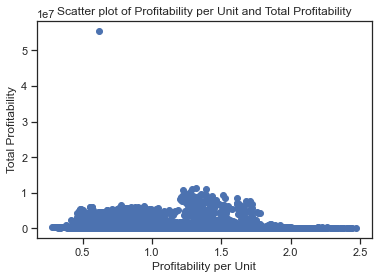

In [38]:
# Scatter plot of Profitability per Unit and Total Profitability
plt.scatter(data_allNotTotalUS.Profitabilityperunit, data_allNotTotalUS.Totalprofitability)
plt.xlabel('Profitability per Unit')
plt.ylabel('Total Profitability')
plt.title('Scatter plot of Profitability per Unit and Total Profitability')
print("Total Correlation between Profitability per Unit and Total Profitability: {}"
      .format(data_allNotTotalUS.Profitabilityperunit.corr(data_allNotTotalUS.Totalprofitability)))

The correlation between Profitability per Unit and Total Profitability for conventional mangoes is 0.161


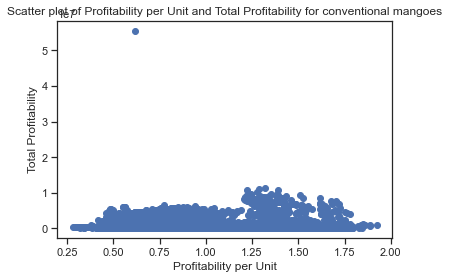

In [39]:
# Scatter plot of Profitability per Unit and Total Profitability for conventional mangoes
data_allNotTotalUSCon = data_allNotTotalUS[data_allNotTotalUS["type"] == "conventional"]
plt.scatter(data_allNotTotalUSCon.Profitabilityperunit, data_allNotTotalUSCon.Totalprofitability)
plt.xlabel('Profitability per Unit')
plt.ylabel('Total Profitability')
plt.title('Scatter plot of Profitability per Unit and Total Profitability for conventional mangoes')
corr_con = data_allNotTotalUSCon.Profitabilityperunit.corr(data_allNotTotalUSCon.Totalprofitability)
print("The correlation between Profitability per Unit and Total Profitability for conventional mangoes is {}"
      .format(corr_con.round(3)))

The correlation between Profitability per Unit and Total Profitability for organic mangoes is 0.086


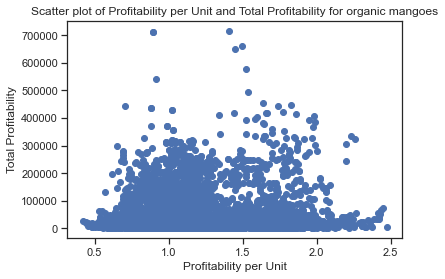

In [40]:
# Scatter plot of Profitability per Unit and Total Profitability for organic mangoes
data_allNotTotalUSOrg = data_allNotTotalUS[data_allNotTotalUS["type"] == "organic"]
plt.scatter(data_allNotTotalUSOrg.Profitabilityperunit, data_allNotTotalUSOrg.Totalprofitability)
plt.xlabel('Profitability per Unit')
plt.ylabel('Total Profitability')
plt.title('Scatter plot of Profitability per Unit and Total Profitability for organic mangoes')
corr_org = data_allNotTotalUSOrg.Profitabilityperunit.corr(data_allNotTotalUSOrg.Totalprofitability)
print("The correlation between Profitability per Unit and Total Profitability for organic mangoes is {}"
      .format(corr_org.round(3)))

For the overall dataset, the correlation is negative between profitability per unit and total profitability
but close to 0. It can be seen from the scatter plot that it is hard to identify a relationship however, 
according to the correlation it is slightly negative. 

For the scatter plot between profitability per unit and total profitability of conventional mangoes,
it is also difficult to identify a relationship, but the correlation confirms that it is positive, with a value
of 0.16.

For the scatter plot between profitability per unit and total profitability of organic mangoes,
it is even harder to identify a relationship, but the correlation confirms that it is positive and close to 0

The correlation between profitability per unit and total profitability of 
conventional mangoes is around 2 times higher than the correlation for organic mangoes, which
further proves the point that a higher profitability per unit for organic mangoes does not necessarily mean that
the total proftability will be higher as well. It seems like volume is the determining factor of higher profits
for the type of mangoes. The volume of conventional mangoes is significantly higher than the volume of 
organic mangoes and as a result, the profits are also higher based on the results. This is further emphasized
by the high correlation of 0.88 between total volume and total profitability.

Text(0.5, 1.0, 'Total Profitability of Conventional Mangos by Region')

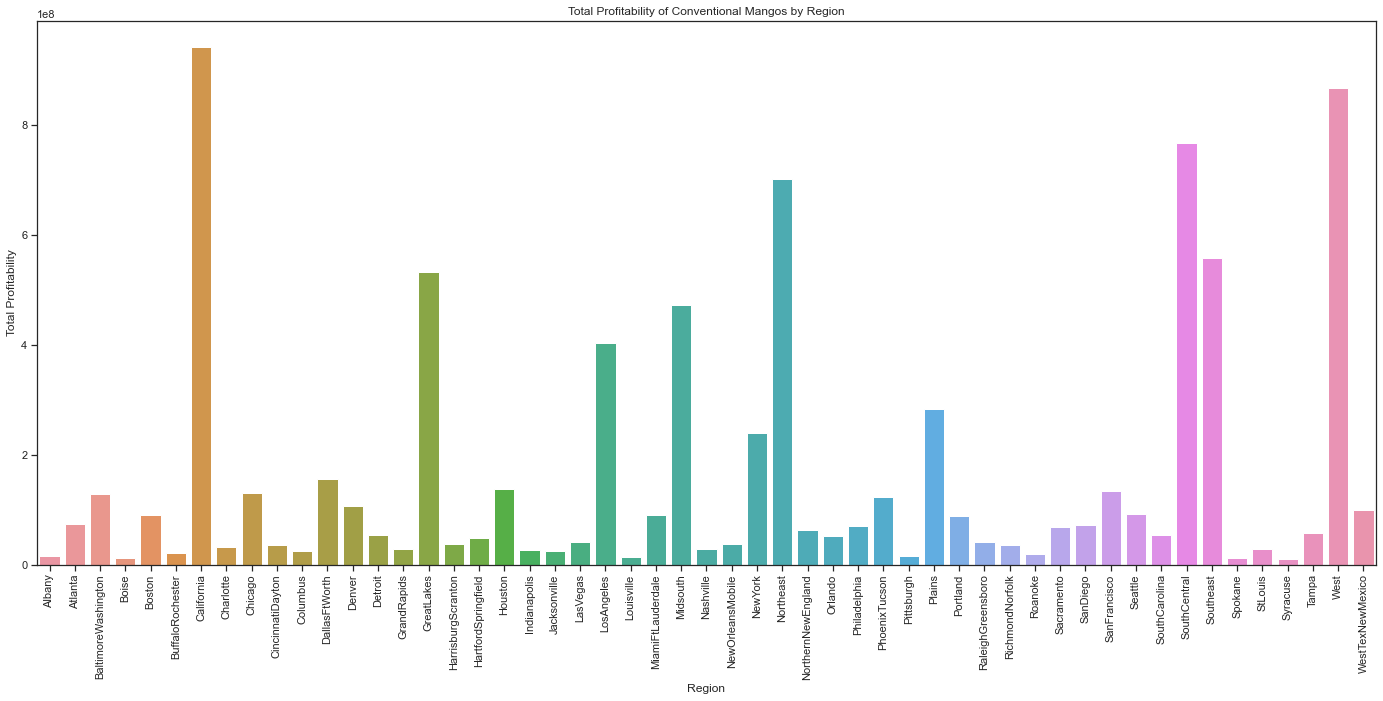

In [41]:
# Plotting the total profitability of conventional mangos by region
region_listCon = list(data_allNotTotalUSCon.region.unique())
total_profCon = []

for j in region_listCon:
    x = data_allNotTotalUSCon[data_allNotTotalUSCon.region == j]
    type_profCon = sum(x.Totalprofitability)
    total_profCon.append(type_profCon)
     
    
plt.figure(figsize = (24,10))
ax = sns.barplot(x = region_listCon, y = total_profCon)

plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Total Profitability')
plt.title('Total Profitability of Conventional Mangos by Region')

The regions that stand out in particular and have very high profits for conventional mangoes are California, Northeast, South Central and West. 

Text(0.5, 1.0, 'Total Profitability of Organic Mangos by Region')

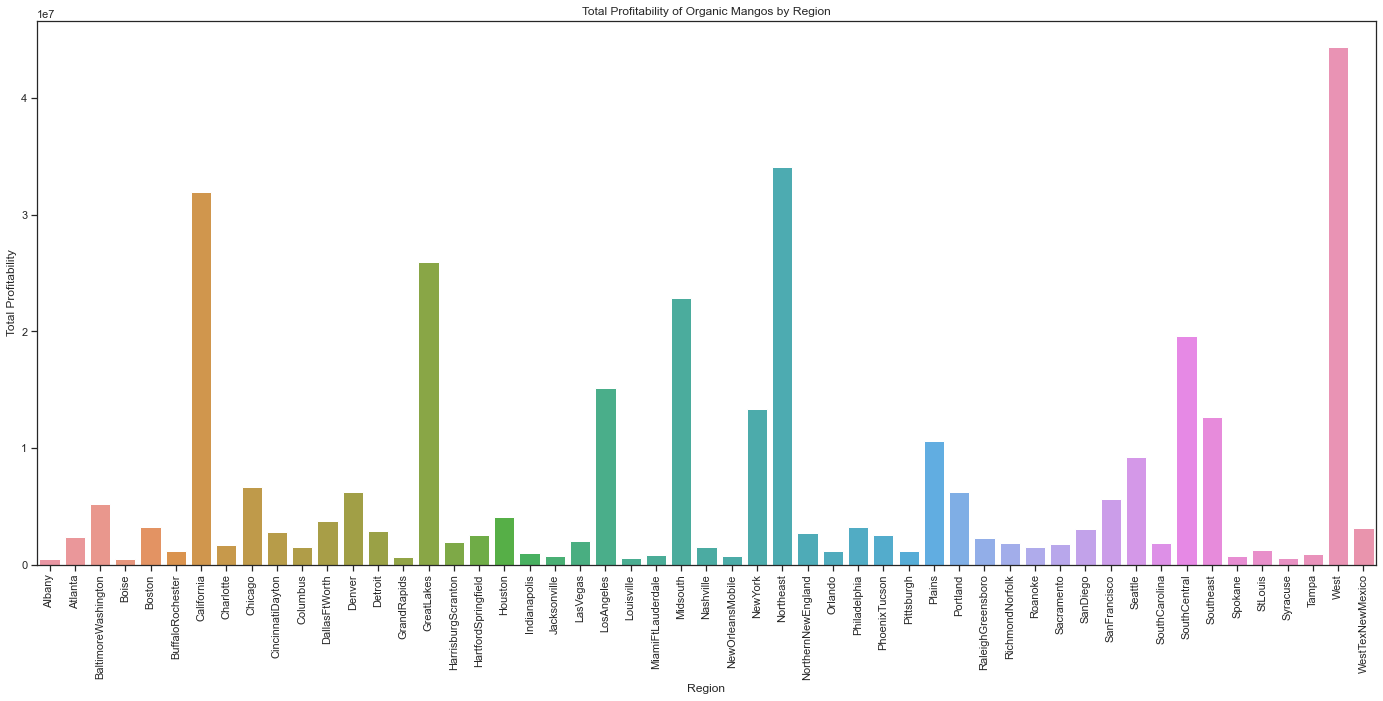

In [42]:
# Plotting the total profitability of organic mangos by region
region_listOrg = list(data_allNotTotalUSOrg.region.unique())
total_profOrg = []

for j in region_listOrg:
    x = data_allNotTotalUSOrg[data_allNotTotalUSOrg.region == j]
    type_profOrg = sum(x.Totalprofitability)
    total_profOrg.append(type_profOrg)
     
    
plt.figure(figsize = (24,10))
ax = sns.barplot(x = region_listOrg, y = total_profOrg)

plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Total Profitability')
plt.title('Total Profitability of Organic Mangos by Region')

The regions that stand out in particular and have high profits for organic mangoes are West, Northeast and California.

Note: The conventional mango total profitability is subtracted from the organic mango total profitability for each region


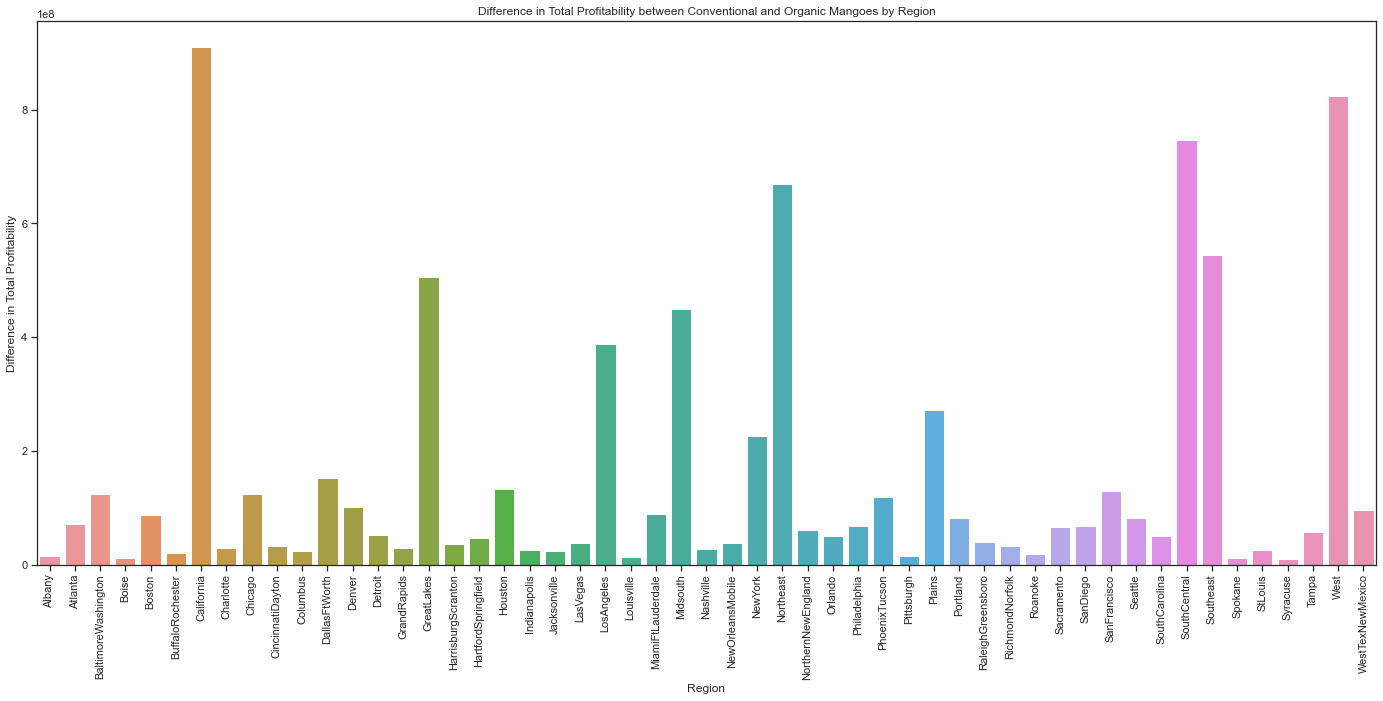

In [43]:
# Checking those regions where organic profits are larger than conventional profits for mangoes
region_list = list(data_allNotTotalUS.region.unique())
difference_profit_region = []

for j in region_listOrg:
    x = data_allNotTotalUSOrg[data_allNotTotalUSOrg.region == j]
    y = data_allNotTotalUSCon[data_allNotTotalUSCon.region == j]
    type_profOrg = sum(x.Totalprofitability)
    type_profCon = sum(y.Totalprofitability)
    difference_profit_region.append(type_profCon - type_profOrg)
    
plt.figure(figsize = (24,10))
ax = sns.barplot(x = region_listOrg, y = difference_profit_region)

plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Difference in Total Profitability')
plt.title('Difference in Total Profitability between Conventional and Organic Mangoes by Region')
print("Note: The conventional mango total profitability is subtracted from the organic mango total profitability for each region")

Looking at the bar plot above, we can see that for all regions, the value of the bar is positive. This is an
indication that the total profitability of conventional mangoes is higher than organic mangoes for all regions.
Some regions that stand out in particular are California, Northeast, South Central and West. These regions have very
high values compared to the other regions, which means that their total profitability for conventional mangoes was
very much higher than for the organic mangoes. Considering that these are very large regions in the United States, it could be that the availability of organic mangoes is a lot less in comparison to conventional mangoes, resulting in what we have found. Also, due to the large populations in these regions it might be that conventional mangoes are more popular with a larger proportion of the region than organic mangoes.

Final Conclusion Statement 2: False - The profits of non-organic mangoes are greater than organic mangoes (Based on the visualisations, statistical descriptions and explanations above)